In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Titanic = pd.read_csv("titanic.csv", encoding="ISO-8859-1")
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [174]:
Titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [175]:
print(Titanic['Age'])
Titanic.isnull().sum()
Titanic["Cabin"].fillna('G6', inplace=True)
Titanic.tail()
Titanic['Age'].fillna(Titanic['Age'].mean(), inplace= True)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


<AxesSubplot:xlabel='Age', ylabel='Sex'>

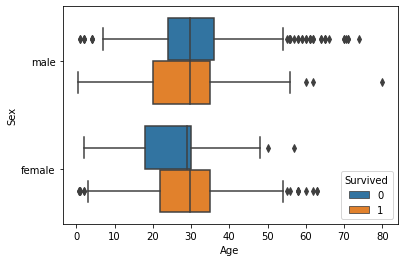

In [176]:
import seaborn as sns
sns.boxplot(data=Titanic, x='Age', y='Sex', hue ='Survived')


<AxesSubplot:xlabel='Age', ylabel='Embarked'>

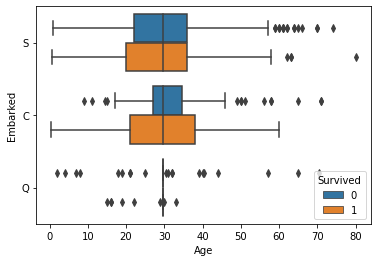

In [177]:
import seaborn as sns
sns.boxplot(data=Titanic, x='Age', y='Embarked', hue ='Survived')

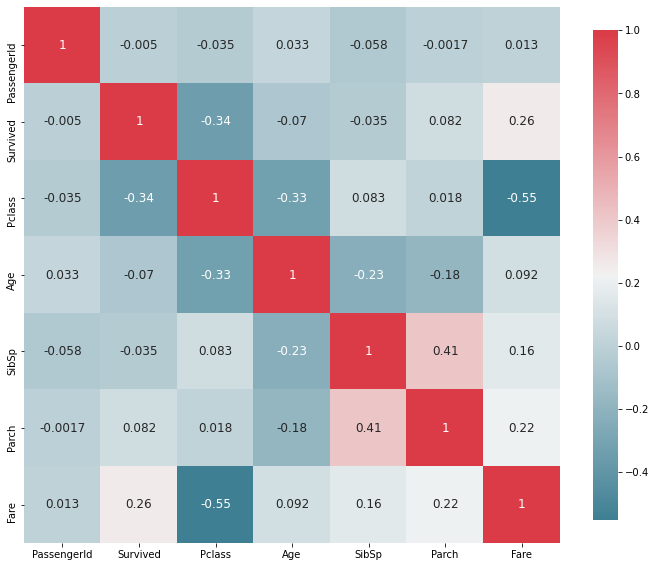

In [178]:

def plot_correlation_map( Titanic ):

    corr = Titanic.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map(Titanic)

In [180]:
Titanic[["Survived", "Pclass"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [182]:
Titanic.drop(columns=['Name'])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,G6,S,Mr
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,Miss
3,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,male,35.000000,0,0,373450,8.0500,G6,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,G6,S,Rev
887,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,G6,S,Miss
889,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C,Mr


In [183]:
Newdata = Titanic.Name.str.split(',', expand=True,n=4)
#Newdata1['Title'] = Newdata[1]
#Titanic['Title'] = Newdata[1]
#Titanic
Newdata1=Newdata[1].str.split('.',expand=True)
Titanic['Title']= Newdata1[0]
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,G6,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,G6,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr


In [151]:
Titanic[["Survived", "Title"]].groupby(["Title"], as_index=True).mean()

,Survived
Title,
Capt,0.000000
Col,0.500000
Don,0.000000
Dr,0.428571
Jonkheer,0.000000
Lady,1.000000
Major,0.500000
Master,0.575000
Miss,0.697802


In [184]:
titlesDictionnary = {"Capt":"Officer", "Col":"Officer", "Major":"Officer", "Dr":"Officer",
                    "Rev":"Officer", "Jonkheer":"Royalty", "Don":"Royalty", "Sir" :"Royalty", 
                    "Lady" :"Royalty", "the Countess":"Royalty", "Dona":"Royalty",
                    "Mme":"Mme", "Mlle":"Mme", "Miss" :"Miss", "Ms":"Mme", "Mr":"Mr", "Mrs":"Mrs", "Master":"Master"}


In [186]:
#map_result=list(map(Title_Dictionary,Titanic['Title']))
Titanic['Title']= Titanic['Title'].map(titlesDictionnary)
#print(map_result)


In [188]:
Titanic.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,G6,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,NaN
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,G6,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,NaN
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,G6,S,NaN
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,G6,Q,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,G6,S,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,G6,S,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,NaN


In [10]:
Titanic['FamilySize'] = Titanic['SibSp'] + Titanic['Parch'] + 1

print (Titanic[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [2]:
#not in the checkpoint

one_hot1 = pd.get_dummies(Titanic['Sex'])
#Titanic = Titanic.drop('Sex', axis=1)
Titanic = Titanic.join(one_hot1)
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


In [3]:
#not in the checkpoint
one_hot1 = pd.get_dummies(Titanic['Embarked'])
#Titanic = Titanic.drop('Embarked', axis=1)
Titanic = Titanic.join(one_hot1)
Titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,1,0,0
